In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
# Load the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [7]:
# Exploratory data analysis
print(data.shape)
print(data.head())
print(data.describe())
print(data.info())

(5110, 12)
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
                 id          age  hypertensio

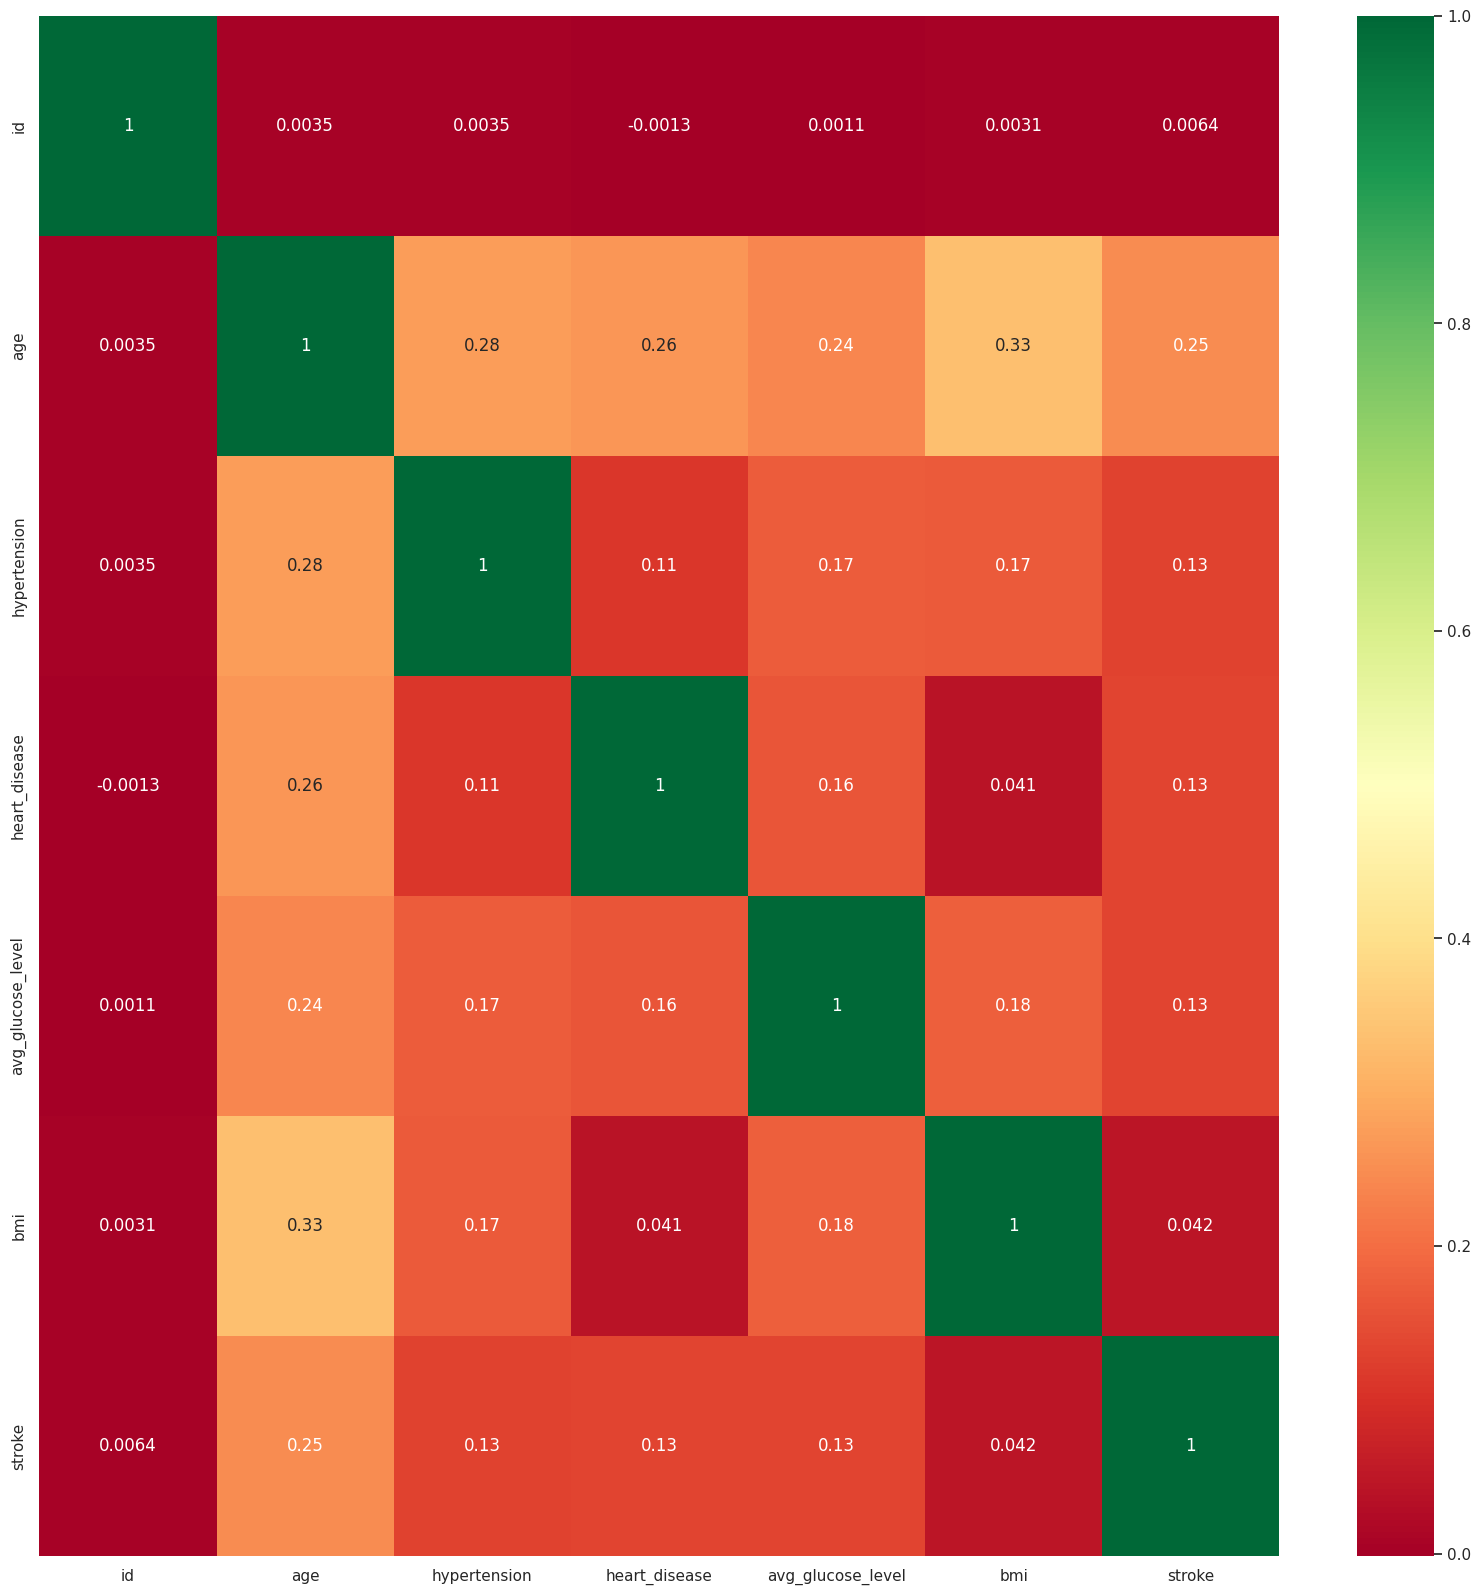

In [32]:
# Visualizing the correlation matrix of numerical features
numerical_data = data.select_dtypes(include=['int64', 'float64'])
corrmat = numerical_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()

In [43]:
# Separating features and target
X = data.drop("stroke", axis=1)
y = data["stroke"]

In [44]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()


In [45]:
# Creating preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [46]:
# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [47]:
# Creating a full preprocessing pipeline
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('pca', PCA(n_components=0.95))])

In [48]:
# Preprocessing and PCA transformation
X_processed = full_pipeline.fit_transform(X)

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.20, random_state=0)


In [50]:
# Model training and evaluation
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(n_estimators=500, random_state=25)

In [51]:
# KNN Classifier
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy score using K-Nearest Neighbors:", accuracy_score(y_test, y_pred_knn))



Accuracy score using K-Nearest Neighbors: 0.9373776908023483


In [52]:
# Random Forest Classifier
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy score using Random Forest:", accuracy_score(y_test, y_pred_rf))

Accuracy score using Random Forest: 0.9461839530332681


In [55]:
# Gradient Boosting Classifier
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy score using Gradient Boosting Classifier:", accuracy_score(y_test, y_pred_gb))

Accuracy score using Gradient Boosting Classifier: 0.9432485322896281


In [54]:
# Combined model approach by averaging predictions from KNN and RF
combined_predictions = np.round((y_pred_knn + y_pred_rf) / 2).astype(int)
print("Accuracy score using Combined Model (KNN + RF):", accuracy_score(y_test, combined_predictions))

Accuracy score using Combined Model (KNN + RF): 0.9461839530332681
